# PS9 solutions
### Heather Chen
### 1. Neural network horse race

(a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drink_df = pd.read_csv('./data/strongdrink.txt')
drink_df

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
172,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
173,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
174,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


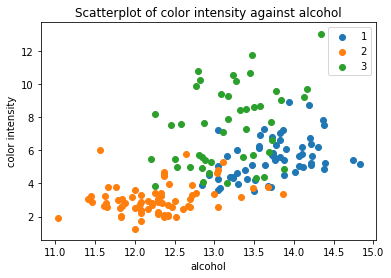

In [7]:
fig, ax = plt.subplots()

for typewine in [1,2,3]:
    data = drink_df.loc[drink_df['cultivar']==typewine]
    ax.scatter(data.alco, data.color_int, label=typewine)

ax.legend()
plt.xlabel('alcohol')
plt.ylabel('color intensity')
plt.title('Scatterplot of color intensity against alcohol')
plt.show()

(b)

In [12]:
from sklearn.linear_model import LogisticRegression

X = drink_df[['alco','malic','tot_phen','color_int']]
y = drink_df['cultivar']

In [16]:
mlog = LogisticRegression(solver='newton-cg', multi_class='multinomial').fit(X, y)

In [20]:
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression().fit(X, y), 
                                    param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                     scoring='neg_mean_squared_error')
random_search1.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=200, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x123669090>,
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=25, refit=True,
                   r

In [21]:
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'}
RandBestScore1= 0.11931818181818182


(c)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=25).fit(X, y)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

param_dist2 = {'n_estimators':sp_randint(10,200),
                'max_depth': sp_randint(2,4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_search2 = RandomizedSearchCV(rfc, param_distributions=param_dist2,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

In [26]:
random_search2.fit(X,y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)

RandBestEstimator2= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=176,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)
RandBestParams2= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
RandBestScore2= 0.13068181818181818


(d)

In [36]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

svc = SVC(kernel="rbf").fit(X, y)

In [37]:
param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0),
               'gamma':["scale","auto"],
               'shrinking':[True,False]}

random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

In [38]:
random_search3.fit(X,y)
print('RandBestEstimator3=', random_search3.best_estimator_)
print('RandBestParams3=', random_search3.best_params_)
print('RandBestScore3=', -random_search3.best_score_)

RandBestEstimator3= SVC(C=9.58835943424229, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
RandBestParams3= {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
RandBestScore3= 0.13636363636363635


(e)

In [39]:
from sklearn.neural_network import MLPClassifier

mlp= MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1).fit(X, y)

In [40]:
param_dist4 = {'hidden_layer_sizes':sp_randint(1, 100),
               'activation':["logistic", "relu"],
               'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

In [41]:
random_search4.fit(X,y)
print('RandBestEstimator4=', random_search4.best_estimator_)
print('RandBestParams4=', random_search4.best_params_)
print('RandBestScore4=', -random_search4.best_score_)

RandBestEstimator4= MLPClassifier(activation='relu', alpha=0.7965389843643799, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=91, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
RandBestParams4= {'activation': 'relu', 'alpha': 0.7965389843643799, 'hidden_layer_sizes': 91}
RandBestScore4= 0.07954545454545454


(f) <br>
The best model to predict cultivar is MLPClassifier, as it renders the lowest MSE score. 